In [30]:
import sys
import pandas as pd
import numpy as np
from collections import Counter
import pickle
import os

sys.path.append("../code/")
from data_processing import groups_at_time_t

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import palettable as pltt
%matplotlib inline

plt.rcParams['xtick.major.width'] = 1.2
plt.rcParams['ytick.major.width'] = 1.2
plt.rcParams['xtick.minor.size'] = 2
plt.rcParams['xtick.minor.width'] = 1.2
plt.rcParams['ytick.minor.size'] = 2
plt.rcParams['ytick.minor.width'] = 1.2
plt.rcParams['axes.linewidth'] = 1.2

import matplotlib as mplt
mplt.rcParams['font.sans-serif'] = 'Avenir'

In [ ]:
#Setting up local directories
DIRs_TO_CREATE = ["figures", "results", "temp"]
        
for directory in DIRs_TO_CREATE:
    if not os.path.exists(directory):
        os.makedirs(directory)

### I start by pre-computing the groups in time before and after triadic closure

Computing groups after triadic closure

In [3]:
input_path = "../data-processed/CNS/"
fname = "CNS_bluetooth_processed.csv.gz"
df = pd.read_csv(input_path+fname, sep=',')
df.head()

,# timestamp,user_a,user_b,rssi,datetime,DoW,hour
0,0,0,-1,0,2013-03-03 00:00:00,Sunday,0
1,0,1,-1,0,2013-03-03 00:00:00,Sunday,0
2,0,2,-1,0,2013-03-03 00:00:00,Sunday,0
3,0,5,-1,0,2013-03-03 00:00:00,Sunday,0
4,0,6,-1,0,2013-03-03 00:00:00,Sunday,0


In [4]:
groups_at_t_dict = {}

for timestamp in df['# timestamp'].unique():
    groups_at_t_dict[timestamp] = groups_at_time_t(df, timestamp)

In [7]:
output_path = "results/"
fname = "CNS_groups_at_t_dict_after_triclo.p"
pickle.dump(groups_at_t_dict, open(output_path+fname, "wb" ) )

Before triadic closure

In [13]:
input_path = "temp/"
fname = "CNS_bluetooth_thresholded_filled_and_nosingletons.csv.gz"
df = pd.read_csv(input_path+fname, sep=',')
df.head()

,# timestamp,user_a,user_b,rssi
0,0,0,-1,0.0
1,0,1,-1,0.0
2,0,2,-1,0.0
3,0,5,-1,0.0
4,0,6,-1,0.0


In [11]:
groups_at_t_dict = {}

for timestamp in df['# timestamp'].unique():
    groups_at_t_dict[timestamp] = groups_at_time_t(df, timestamp)

In [12]:
output_path = "results/"
fname = "CNS_groups_at_t_dict_before_triclo.p"
pickle.dump(groups_at_t_dict, open(output_path+fname, "wb" ) )

### Checking the number of added links in time

In [15]:
#Before triadic closure

output_path = "temp/"
fname = "CNS_bluetooth_thresholded_filled_and_nosingletons.csv.gz"
df = pd.read_csv(output_path+fname)

#Removing isolated nodes
df = df[df['user_b']!=-1]

#counting how many interactions there are for each timestamp
df_count = df.groupby('# timestamp').size().reset_index(name='counts')
df_count.head()

,# timestamp,counts
0,0,35
1,1,42
2,2,43
3,3,43
4,4,44


In [16]:
#After triadic closure with the selected threshold $\phi=-75$

th=-75
output_path = "temp/"
fname = "CNS_bluetooth_thresholded_filled_nosingletons_and_triclo_thr%i_datetime.csv.gz"%(abs(th))
new_df = pd.read_csv(output_path+fname)

#Removing isolated nodes
new_df = new_df[new_df['user_b']!=-1]

#counting how many interactions there are for each timestamp
new_df_count = new_df.groupby('# timestamp').size().reset_index(name='counts')
new_df_count.head()

,# timestamp,counts
0,0,35
1,1,42
2,2,43
3,3,43
4,4,45


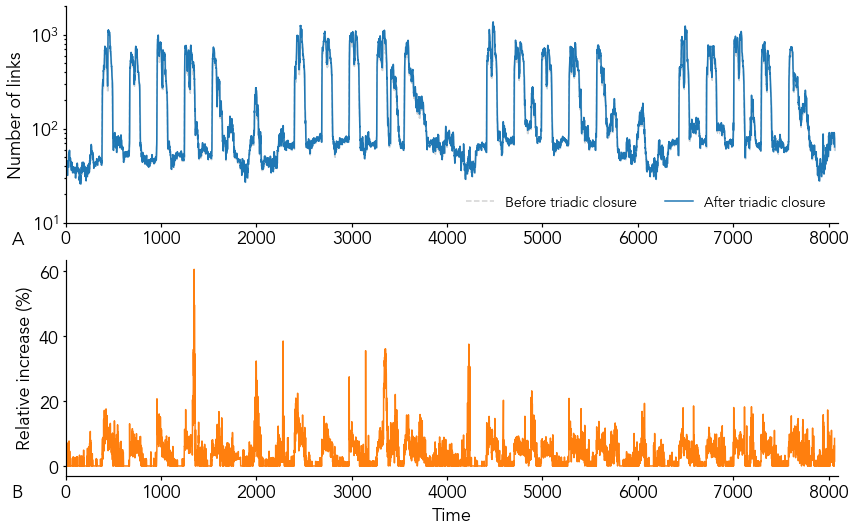

In [17]:
plt.figure(figsize=(12, 7.5))

ax = plt.subplot(211)

ax.plot(df_count['# timestamp'], df_count['counts'], '--', color='lightgray', label='Before triadic closure')
ax.plot(new_df_count['# timestamp'], new_df_count['counts'], '-', color='C0', label='After triadic closure')
ax.fill_between(new_df_count['# timestamp'], df_count['counts'], new_df_count['counts'],
                color='C0', alpha=0.3)

ax.set_ylabel('Number of links', size=18)
ax.tick_params(axis='both', which='major', labelsize=18)

ax.set_yscale('log')
ax.set_ylim(1e1,2e3)
ax.set_xlim(0, 8100)

ax.legend(frameon=False, fontsize=14, loc='lower right', ncol=2)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

ax.text(-0.07, -0.1, 'A', transform=ax.transAxes, size=18)

########################################################################

ax = plt.subplot(212)

ax.plot(df_count['# timestamp'], 100*(new_df_count['counts']-df_count['counts'])/df_count['counts'], '-', color='C1')

ax.set_xlabel('Time', size=18)
ax.set_ylabel('Relative increase (%)', size=18)
ax.tick_params(axis='both', which='major', labelsize=18)

ax.set_xlim(0, 8100)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

ax.text(-0.07, -0.1, 'B', transform=ax.transAxes, size=18)

########################################################################

plt.tight_layout()

filename = "figures/CNS_triclo_th75_in_time.pdf"
plt.savefig(filename, bbox_inches='tight', dpi=150, transparent=False, facecolor='white')

### Number of added groups in time

In [18]:
output_path = "results/"
fname = "CNS_groups_at_t_dict_after_triclo.p"
groups_at_t_triclo = pickle.load(open(output_path+fname, "rb" ) )

output_path = "results/"
fname = "CNS_groups_at_t_dict_before_triclo.p"
groups_at_t_notriclo = pickle.load(open(output_path+fname, "rb" ) )

In [19]:
t = list(groups_at_t_triclo.keys())
ngroups_t_triclo = [len(g) for g in groups_at_t_triclo.values()]
ngroups_t_notriclo = [len(g) for g in groups_at_t_notriclo.values()]

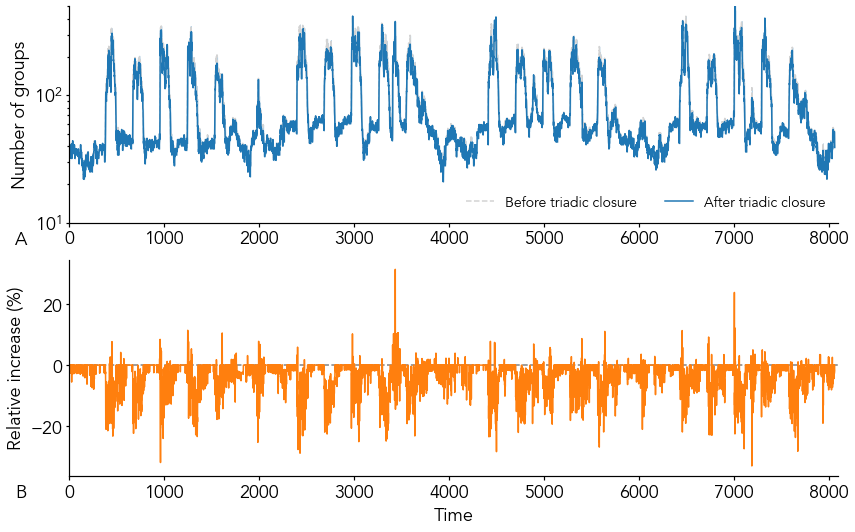

In [22]:
plt.figure(figsize=(12, 7.5))

ax = plt.subplot(211)

ax.plot(t, ngroups_t_notriclo, '--', color='lightgray', label='Before triadic closure')
ax.plot(t, ngroups_t_triclo, '-', color='C0', label='After triadic closure')
ax.fill_between(t, ngroups_t_notriclo, ngroups_t_triclo,
                color='C0', alpha=0.3)

ax.set_ylabel('Number of groups', size=18)
ax.tick_params(axis='both', which='major', labelsize=18)

ax.set_yscale('log')
ax.set_ylim(1e1,5e2)
ax.set_xlim(0, 8100)

ax.legend(frameon=False, fontsize=14, loc='lower right', ncol=2)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

ax.text(-0.07, -0.1, 'A', transform=ax.transAxes, size=18)

########################################################################

ax = plt.subplot(212)

ax.plot(t, 100*(np.array(ngroups_t_triclo)-np.array(ngroups_t_notriclo))/np.array(ngroups_t_notriclo), '-', color='C1')

ax.set_xlabel('Time', size=18)
ax.set_ylabel('Relative increase (%)', size=18)
ax.tick_params(axis='both', which='major', labelsize=18)

ax.set_xlim(0, 8100)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

ax.axhline(y=0, xmin=0, xmax=8100, color='gray', ls='--', zorder=0)

ax.text(-0.07, -0.1, 'B', transform=ax.transAxes, size=18)

########################################################################

plt.tight_layout()

filename = "figures/CNS_ngroups_triclo_th75_in_time.pdf"
plt.savefig(filename, bbox_inches='tight', dpi=150, transparent=False, facecolor='white')

## Impact of triadic closure on group size distributions

In [24]:
input_path = "results/"

fname = "CNS_groups_at_t_dict_after_triclo.p"
groups_at_t_triclo = pickle.load(open(input_path+fname, "rb" ) )

fname = "CNS_groups_at_t_dict_before_triclo.p"
groups_at_t_notriclo = pickle.load(open(input_path+fname, "rb" ) )

I want to distinguish the different temporal contexts, so I will take a dataframe from the raw data to get the timestamps associated to each period

In [28]:
input_path = "../data-processed/CNS/"
fname = "CNS_bluetooth_processed.csv.gz"
df = pd.read_csv(input_path+fname, sep=',')

#Selecting weekends
weekends_timestamps = list(df[(df['DoW']=='Sunday')|(df['DoW']=='Saturday')]['# timestamp'].unique())
#Selecting workweek days classtime
workweek_class_timestamps = list(df[(df['DoW']!='Sunday')&(df['DoW']!='Saturday')&((df['hour']>=8)&(df['hour']<=17))]['# timestamp'].unique())
#Selecting workweek days out of classtime
workweek_noclass_timestamps = list(df[(df['DoW']!='Sunday')&(df['DoW']!='Saturday')&((df['hour']<8)|(df['hour']>17))]['# timestamp'].unique())

Dividing the pre-computed groups according to the context

In [31]:
#After triadic closure

weekends_groups_sizes = []

for t in weekends_timestamps:
    weekends_groups_sizes += [len(g) for g in groups_at_t_triclo[t]]
    
workweek_class_groups_sizes = []

for t in workweek_class_timestamps:
    workweek_class_groups_sizes += [len(g) for g in groups_at_t_triclo[t]]

workweek_noclass_groups_sizes = []

for t in workweek_noclass_timestamps:
    workweek_noclass_groups_sizes += [len(g) for g in groups_at_t_triclo[t]]
    
weekends_gfreq = Counter(weekends_groups_sizes)
workweek_class_gfreq = Counter(workweek_class_groups_sizes)
workweek_noclass_gfreq = Counter(workweek_noclass_groups_sizes)

In [32]:
#Before triadic closure

weekends_groups_sizes = []

for t in weekends_timestamps:
    weekends_groups_sizes += [len(g) for g in groups_at_t_notriclo[t]]

workweek_class_groups_sizes = []

for t in workweek_class_timestamps:
    workweek_class_groups_sizes += [len(g) for g in groups_at_t_notriclo[t]]

workweek_noclass_groups_sizes = []

for t in workweek_noclass_timestamps:
    workweek_noclass_groups_sizes += [len(g) for g in groups_at_t_notriclo[t]]
    
weekends_gfreq_notriclo = Counter(weekends_groups_sizes)
workweek_class_gfreq_notriclo = Counter(workweek_class_groups_sizes)
workweek_noclass_gfreq_notriclo = Counter(workweek_noclass_groups_sizes)

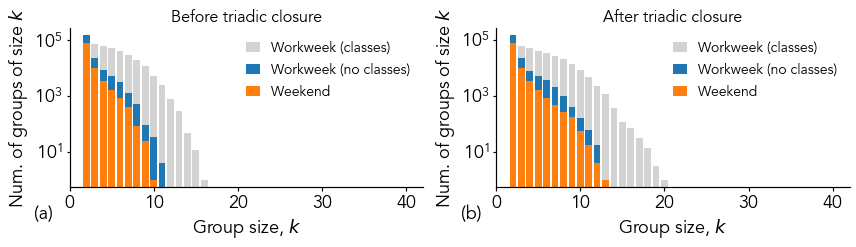

In [34]:
plt.figure(figsize=(12, 3.5))

ax = plt.subplot(122)

ax.bar(workweek_class_gfreq.keys(), workweek_class_gfreq.values(), label='Workweek (classes)',
           color='lightgray')

ax.bar(workweek_noclass_gfreq.keys(), workweek_noclass_gfreq.values(), label='Workweek (no classes)',
           color='C0')

ax.bar(weekends_gfreq.keys(), weekends_gfreq.values(), label='Weekend',
           color='C1')


ax.set_xlabel('Group size, $k$', size=18)
ax.set_ylabel('Num. of groups of size $k$', size=18)
ax.tick_params(axis='both', which='major', labelsize=18)

ax.set_title('After triadic closure', size=16)

ax.set_yscale('log')
ax.set_xlim(0, 42)

ax.legend(frameon=False, fontsize=14, handlelength=1)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

ax.text(-0.1, -0.2, '(b)', transform=ax.transAxes, size=18)

########################################################################

ax = plt.subplot(121)

ax.bar(workweek_class_gfreq_notriclo.keys(), workweek_class_gfreq_notriclo.values(), label='Workweek (classes)',
           color='lightgray')

ax.bar(workweek_noclass_gfreq_notriclo.keys(), workweek_noclass_gfreq_notriclo.values(), label='Workweek (no classes)',
           color='C0')

ax.bar(weekends_gfreq_notriclo.keys(), weekends_gfreq_notriclo.values(), label='Weekend',
           color='C1')

ax.set_xlabel('Group size, $k$', size=18)
ax.set_ylabel('Num. of groups of size $k$', size=18)
ax.tick_params(axis='both', which='major', labelsize=18)

ax.set_title('Before triadic closure', size=16)

ax.set_yscale('log')
ax.set_xlim(0, 42)

ax.legend(frameon=False, fontsize=14, handlelength=1)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

ax.text(-0.1, -0.2, '(a)', transform=ax.transAxes, size=18)

plt.tight_layout()

filename = "figures/CNS_triclo_gsize_workweekends.pdf"
plt.savefig(filename, bbox_inches='tight', dpi=150)

### Impact of the RSSI threshold for triadic closure on the group size distributions

First I need to compute the groups from the dataframe of interactions with triadic closure filtered by RSSI

In [38]:
triclo_thresholds = np.arange(-90,-30,5)
input_path = "temp/"
output_path = "temp/"

for th in triclo_thresholds:
    fname = "CNS_bluetooth_thresholded_filled_nosingletons_and_triclo_thr%i_datetime.csv.gz"%(abs(th))
    df = pd.read_csv(input_path+fname, sep=",")
    
    groups_at_t_dict = {}
    for timestamp in df['# timestamp'].unique():
        groups_at_t_dict[timestamp] = groups_at_time_t(df, timestamp)
        
    fname = "CNS_groups_at_t_dict_after_triclo_thr%i.p"%(abs(th))
    pickle.dump(groups_at_t_dict, open(output_path+fname, "wb" ) )

In [39]:
triclo_thresholds = np.arange(-90,-30,5)
input_path_groups = "temp/"

weekends_gfreq_th = {}
workweek_class_gfreq_th = {}
workweek_noclass_gfreq_th = {}    
    
for th in triclo_thresholds:
    print('RSSI threshold', th)
    
    #Reading computed groups
    fname = "CNS_groups_at_t_dict_after_triclo_thr%i.p"%(abs(th))
    groups_at_t_triclo_th = pickle.load(open(input_path_groups+fname, "rb" ) )

    weekends_groups_sizes = []
    for t in weekends_timestamps:
        weekends_groups_sizes += [len(g) for g in groups_at_t_triclo_th[t]]
    
    workweek_class_groups_sizes = []
    for t in workweek_class_timestamps:
        workweek_class_groups_sizes += [len(g) for g in groups_at_t_triclo_th[t]]

    workweek_noclass_groups_sizes = []
    for t in workweek_noclass_timestamps:
        workweek_noclass_groups_sizes += [len(g) for g in groups_at_t_triclo_th[t]]
    
    weekends_gfreq_th[th] = Counter(weekends_groups_sizes)
    workweek_class_gfreq_th[th] = Counter(workweek_class_groups_sizes)
    workweek_noclass_gfreq_th[th] = Counter(workweek_noclass_groups_sizes)

RSSI threshold -90
RSSI threshold -85
RSSI threshold -80
RSSI threshold -75
RSSI threshold -70
RSSI threshold -65
RSSI threshold -60
RSSI threshold -55
RSSI threshold -50
RSSI threshold -45
RSSI threshold -40
RSSI threshold -35


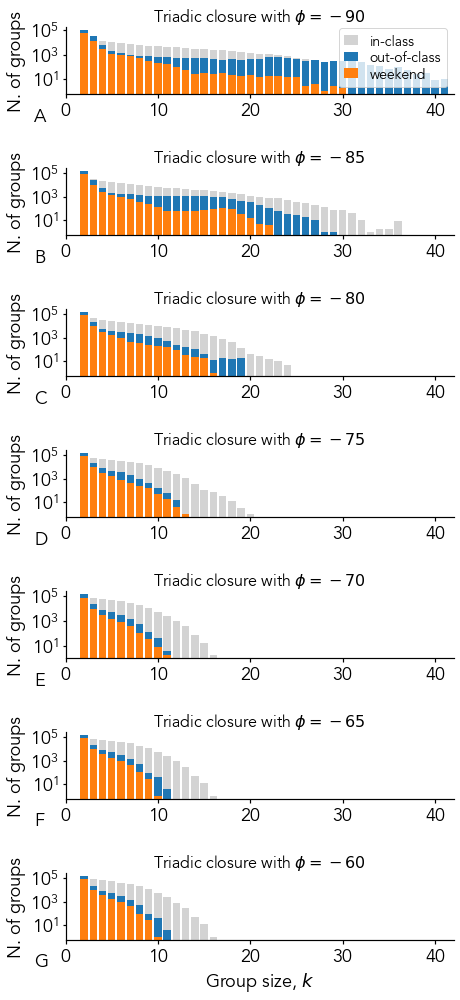

In [45]:
triclo_thresholds = np.arange(-90,-55,5)

axlabels=["A","B","C","D","E","F","G","H","I"]

plt.figure(figsize=(6.5, 14))

for ii, th in enumerate(triclo_thresholds):

    ax = plt.subplot(len(triclo_thresholds), 1, ii+1)

    ax.bar(workweek_class_gfreq_th[th].keys(), workweek_class_gfreq_th[th].values(), label='in-class',
               color='lightgray')

    ax.bar(workweek_noclass_gfreq_th[th].keys(), workweek_noclass_gfreq_th[th].values(), label='out-of-class',
               color='C0')

    ax.bar(weekends_gfreq_th[th].keys(), weekends_gfreq_th[th].values(), label='weekend',
               color='C1')

    if ii==0:
        ax.legend(frameon=True, fontsize=14, handlelength=1, labelspacing=0.1)
    
    if ii==len(triclo_thresholds)-1:
        ax.set_xlabel('Group size, $k$', size=18)
       
    ax.set_ylabel('N. of groups', size=18)
    ax.tick_params(axis='both', which='major', labelsize=18)

    ax.set_title(r'Triadic closure with $\phi=%i$'%th, size=16)

    ax.set_yscale('log')
    ax.set_yticks([1e1,1e3,1e5])
    ax.set_xlim(0, 42)

    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')

    ax.text(-0.08, -0.4, axlabels[ii], transform=ax.transAxes, size=18)

plt.tight_layout()

filename = "figures/CNS_triclo_RSSIthr_gsize_by_context.pdf"
plt.savefig(filename, bbox_inches='tight', dpi=150)